In [85]:
import pandas as pd
train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')

In [86]:
bike_datetime = pd.to_datetime(train['datetime'])

In [87]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [88]:
train['year'] = bike_datetime.dt.year
train['month'] = bike_datetime.dt.month
train['day'] = bike_datetime.dt.day
train['hour'] = bike_datetime.dt.hour
train['minute'] = bike_datetime.dt.minute
train['second'] = bike_datetime.dt.second

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='second', ylabel='count'>

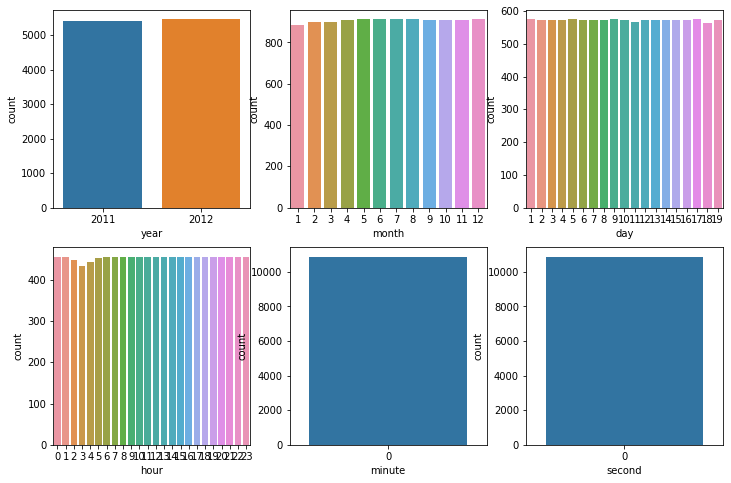

In [90]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
sns.countplot(data=train, x='year', ax=ax[0,0])
sns.countplot(data=train, x='month', ax=ax[0,1])
sns.countplot(data=train, x='day', ax=ax[0,2])
sns.countplot(data=train, x='hour', ax=ax[1,0])
sns.countplot(data=train, x='minute', ax=ax[1,1])
sns.countplot(data=train, x='second', ax=ax[1,2])

In [91]:
train.shape

(10886, 18)

In [92]:
from sklearn.model_selection import train_test_split
new_columns = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual']
X_train, X_test, y_train, y_test = train_test_split(train[new_columns], train['count'], test_size=0.2, random_state=30)

In [93]:
X_test.shape

(2178, 9)

In [94]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [95]:
from sklearn.metrics import mean_squared_error
prediction = model.predict(X_test)
print(prediction)
rmse = mean_squared_error(y_test, prediction) ** 0.5
print(rmse)

[112.88223589 104.49604773  74.6674428  ... 179.1744139   92.01302724
 164.73309316]
124.51645689860993


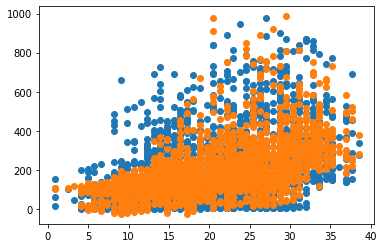

In [96]:
plt.scatter(X_test['temp'], y_test)
plt.scatter(X_test['temp'], prediction)
plt.show()

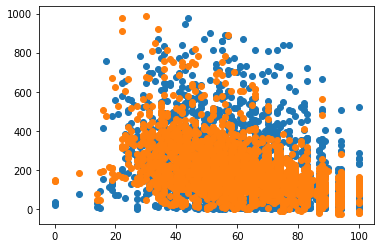

In [97]:
plt.scatter(X_test['humidity'], y_test)
plt.scatter(X_test['humidity'], prediction)
plt.show()